In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
import warnings
warnings.filterwarnings("ignore")

## 2.数据预处理

### 2.1读入excel文件获得数据

In [103]:
df = pd.read_excel("sale.xlsx",encoding="gbk",dtype={'社保卡号': str})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6579 entries, 0 to 6578
Data columns (total 7 columns):
购药时间    6577 non-null object
社保卡号    6579 non-null object
商品编码    6577 non-null float64
商品名称    6578 non-null object
销售数量    6577 non-null float64
应收金额    6577 non-null float64
实收金额    6577 non-null float64
dtypes: float64(4), object(3)
memory usage: 282.7+ KB


In [105]:
df

,购药时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
0,NaN,nan,NaN,NaN,NaN,NaN,NaN
1,NaN,001616527,NaN,三九感冒灵,NaN,NaN,NaN
2,2016-01-01 星期五,001616528,236701.0,三九感冒灵,7.0,196.0,182.00
3,2016-01-02 星期六,001616528,236701.0,三九感冒灵,3.0,84.0,84.00
4,2016-01-06 星期三,0010070343428,236701.0,三九感冒灵,3.0,84.0,73.92
5,2016-01-11 星期一,0013389528,236701.0,三九感冒灵,1.0,28.0,28.00
6,2016-01-15 星期五,00101554328,236701.0,三九感冒灵,8.0,224.0,208.00
7,2016-01-20 星期三,0013389528,236701.0,三九感冒灵,1.0,28.0,28.00
8,2016-01-31 星期日,00101464928,236701.0,三九感冒灵,2.0,56.0,56.00
9,2016-02-17 星期三,0011177328,236701.0,三九感冒灵,5.0,149.0,131.12


## 2.2删除缺失值

In [107]:
df.dropna(how="any",inplace=True) #删除掉含有缺失值的所有行
df.head()

,购药时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
2,2016-01-01 星期五,001616528,236701.0,三九感冒灵,7.0,196.0,182.00
3,2016-01-02 星期六,001616528,236701.0,三九感冒灵,3.0,84.0,84.00
4,2016-01-06 星期三,0010070343428,236701.0,三九感冒灵,3.0,84.0,73.92
5,2016-01-11 星期一,0013389528,236701.0,三九感冒灵,1.0,28.0,28.00
6,2016-01-15 星期五,00101554328,236701.0,三九感冒灵,8.0,224.0,208.00


In [100]:
df.dropna(how="all",inplace=True) #删除满足行内数据均为NaN这个条件的行

## 2.3列重命名

In [110]:
df.rename(columns={"购药时间":"time","社保卡号":"cardno","商品编码":"drugId","商品名称":"drugName",
                    "销售数量":"saleNumber","应收金额":"virtualmoney","实收金额":"actualmoney"},inplace=True)

In [111]:
df.head()

,time,cardno,drugId,drugName,saleNumber,virtualmoney,actualmoney
2,2016-01-01 星期五,001616528,236701.0,三九感冒灵,7.0,196.0,182.00
3,2016-01-02 星期六,001616528,236701.0,三九感冒灵,3.0,84.0,84.00
4,2016-01-06 星期三,0010070343428,236701.0,三九感冒灵,3.0,84.0,73.92
5,2016-01-11 星期一,0013389528,236701.0,三九感冒灵,1.0,28.0,28.00
6,2016-01-15 星期五,00101554328,236701.0,三九感冒灵,8.0,224.0,208.00


## 2.4数据类型转化

In [112]:
df['drugId']=df['drugId'].astype('int')

In [113]:
df.head()

,time,cardno,drugId,drugName,saleNumber,virtualmoney,actualmoney
2,2016-01-01 星期五,001616528,236701,三九感冒灵,7.0,196.0,182.00
3,2016-01-02 星期六,001616528,236701,三九感冒灵,3.0,84.0,84.00
4,2016-01-06 星期三,0010070343428,236701,三九感冒灵,3.0,84.0,73.92
5,2016-01-11 星期一,0013389528,236701,三九感冒灵,1.0,28.0,28.00
6,2016-01-15 星期五,00101554328,236701,三九感冒灵,8.0,224.0,208.00


In [139]:
s1 = df['time'].str.split(' ')

In [122]:
type(s1)

pandas.core.series.Series

In [124]:
s1.head()

2    [2016-01-01, 星期五]
3    [2016-01-02, 星期六]
4    [2016-01-06, 星期三]
5    [2016-01-11, 星期一]
6    [2016-01-15, 星期五]
Name: time, dtype: object

In [140]:
s1.index

Int64Index([   2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
            ...
            6569, 6570, 6571, 6572, 6573, 6574, 6575, 6576, 6577, 6578],
           dtype='int64', length=6577)

 修改series的s1的索引为0-6577

In [144]:
s1.index=range(0,6577)

In [145]:
s1.index

RangeIndex(start=0, stop=6577, step=1)

In [226]:
type(s1[0][0])

str

In [147]:
s1.head()

0    [2016-01-01, 星期五]
1    [2016-01-02, 星期六]
2    [2016-01-06, 星期三]
3    [2016-01-11, 星期一]
4    [2016-01-15, 星期五]
Name: time, dtype: object

构造能够将s1分成时间序列和星期序列

In [175]:
datetime_list = []
week_list = []
def getdate_week(s):
    for i in s.index:
        datetime_list.append(s[i][0]) 
        week_list.append(s[i][1])
        
          

### 2.5在数据的最后一列加入datetime_list和week_list

In [185]:
df["date-time"] = datetime_list

In [162]:
s1[2][1]

'星期三'

In [186]:
df["weekday"] = week_list

In [187]:
df.head()

,time,cardno,drugId,drugName,saleNumber,virtualmoney,actualmoney,date-time,weekday
2,2016-01-01 星期五,001616528,236701,三九感冒灵,7.0,196.0,182.00,2016-01-01,星期五
3,2016-01-02 星期六,001616528,236701,三九感冒灵,3.0,84.0,84.00,2016-01-02,星期六
4,2016-01-06 星期三,0010070343428,236701,三九感冒灵,3.0,84.0,73.92,2016-01-06,星期三
5,2016-01-11 星期一,0013389528,236701,三九感冒灵,1.0,28.0,28.00,2016-01-11,星期一
6,2016-01-15 星期五,00101554328,236701,三九感冒灵,8.0,224.0,208.00,2016-01-15,星期五


### 2.6按照销售时间date-time升序排列

In [192]:
df_sort = df.sort_values(by="date-time")

In [194]:
df_sort.head()

,time,cardno,drugId,drugName,saleNumber,virtualmoney,actualmoney,date-time,weekday
2,2016-01-01 星期五,001616528,236701,三九感冒灵,7.0,196.0,182.0,2016-01-01,星期五
401,2016-01-01 星期五,0010074599128,2367011,开博通,5.0,140.0,125.0,2016-01-01,星期五
400,2016-01-01 星期五,0010072612028,2367011,开博通,1.0,28.0,25.0,2016-01-01,星期五
3890,2016-01-01 星期五,0010014289328,866851,缬沙坦分散片(易达乐),1.0,26.0,23.0,2016-01-01,星期五
2700,2016-01-01 星期五,0013448228,861507,苯磺酸氨氯地平片(安内真),1.0,9.5,8.5,2016-01-01,星期五


将date-time列有str类型转化为int类型

In [282]:
df['date-time']=df['date-time'].astype('datetime64')

TypeError: cannot astype a datetimelike from [datetime64[ns]] to [datetime64]

## 3.简单数据分析

In [228]:
getdate_week(s1)

In [229]:
d1 = Series(datetime_list)
d2 =Series(week_list)

In [230]:
d1

0        2016-01-01
1        2016-01-02
2        2016-01-06
3        2016-01-11
4        2016-01-15
5        2016-01-20
6        2016-01-31
7        2016-02-17
8        2016-02-22
9        2016-02-24
10       2016-03-05
11       2016-03-05
12       2016-03-05
13       2016-03-07
14       2016-03-09
15       2016-03-15
16       2016-03-15
17       2016-03-15
18       2016-03-20
19       2016-03-22
20       2016-03-23
21       2016-03-24
22       2016-03-24
23       2016-03-28
24       2016-03-29
25       2016-04-05
26       2016-04-07
27       2016-04-13
28       2016-04-22
29       2016-05-01
            ...    
13124    2016-04-09
13125    2016-04-10
13126    2016-04-10
13127    2016-04-10
13128    2016-04-12
13129    2016-04-13
13130    2016-04-13
13131    2016-04-14
13132    2016-04-15
13133    2016-04-15
13134    2016-04-15
13135    2016-04-15
13136    2016-04-16
13137    2016-04-17
13138    2016-04-18
13139    2016-04-21
13140    2016-04-22
13141    2016-04-24
13142    2016-04-25


In [231]:
d2

0        星期五
1        星期六
2        星期三
3        星期一
4        星期五
5        星期三
6        星期日
7        星期三
8        星期一
9        星期三
10       星期六
11       星期六
12       星期六
13       星期一
14       星期三
15       星期二
16       星期二
17       星期二
18       星期日
19       星期二
20       星期三
21       星期四
22       星期四
23       星期一
24       星期二
25       星期二
26       星期四
27       星期三
28       星期五
29       星期日
        ... 
13124    星期六
13125    星期日
13126    星期日
13127    星期日
13128    星期二
13129    星期三
13130    星期三
13131    星期四
13132    星期五
13133    星期五
13134    星期五
13135    星期五
13136    星期六
13137    星期日
13138    星期一
13139    星期四
13140    星期五
13141    星期日
13142    星期一
13143    星期一
13144    星期一
13145    星期二
13146    星期二
13147    星期一
13148    星期二
13149    星期三
13150    星期三
13151    星期三
13152    星期三
13153    星期四
Length: 13154, dtype: object

### 3.1月均消费次数

要点：

同一个日期和同一个社保卡号的多个消费记录算作一次消费

可以将单独两列抽出来单独分析，先去重复，然后再计数

这个分析可以画一个每个月的消费次数的柱状图

In [232]:
df_duplicated = df.duplicated(subset=["date-time","cardno"],keep="first")

当数据量比较大的时候，可以看看重复数据和非重复数据的计数分布,True表示重复的

In [233]:
df_duplicated.value_counts()

False    5398
True     1179
dtype: int64

默认保留第一个出现的重复值，删除掉后面的重复值

In [234]:
df_unique = df.drop_duplicates(subset=["date-time","cardno"],keep="first")

In [235]:
df_unique = df_unique[["date-time","cardno"]]

In [236]:
df_unique

,date-time,cardno
2,2016-01-01,001616528
3,2016-01-02,001616528
4,2016-01-06,0010070343428
5,2016-01-11,0013389528
6,2016-01-15,00101554328
7,2016-01-20,0013389528
8,2016-01-31,00101464928
9,2016-02-17,0011177328
10,2016-02-22,0010065687828
11,2016-02-24,0012602828


consume_time_date_ser 是将 date-time 作为 index，构建的 cardno 的时间序列。

In [237]:
consume_time_date_ser = pd.Series(list(df_unique['cardno']), index = df_unique['date-time'])

In [238]:
type(consume_time_date_ser.index)

pandas.core.indexes.datetimes.DatetimeIndex

按照时间序列索引进行排序

In [239]:
consume_time_date_ser.sort_index().head(10)

date-time
2016-01-01        001616528
2016-01-01       0012697828
2016-01-01      00103283128
2016-01-01    0010072612028
2016-01-01    0010074599128
2016-01-01    0010014289328
2016-01-01    0010073966328
2016-01-01    0010015658428
2016-01-01       0013169628
2016-01-01       0011778628
dtype: object

计算总天数

In [248]:
date_interval = consume_time_date_ser.sort_index().index[-1]-consume_time_date_ser.sort_index().index[0]

In [245]:
month_count = int(date_interval.days/30)+1

In [246]:
month_count

7

In [250]:
month_consume = consume_time_date_ser.count()/month_count

In [251]:
month_consume#每月平均消费次数

771.14285714285711

按月份来统计消费次数

In [252]:
month_time = consume_time_date_ser.groupby(consume_time_date_ser.index.month).count()

In [253]:
month_time

date-time
1     853
2     623
3     825
4    1054
5     775
6     755
7     513
dtype: int64

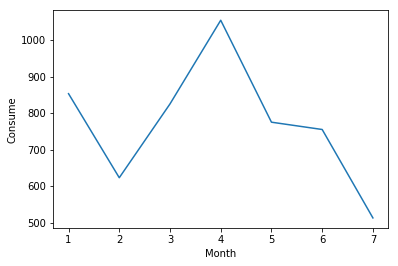

In [260]:
plt.plot(month_time.index, month_time)
plt.xlabel('Month')
plt.ylabel('Consume')
plt.show()

### 3.2月均消费金额

月均消费金额 = 总消费金额 / 月份数

这里可以画一个每月消费总额的柱状图

In [264]:
total_money = df["actualmoney"].sum()

In [265]:
month_money = total_money/month_count

In [267]:
month_money#月均消费金额

43518.6085714287

In [269]:
df.head()

,time,cardno,drugId,drugName,saleNumber,virtualmoney,actualmoney,date-time,weekday
2,2016-01-01 星期五,001616528,236701,三九感冒灵,7.0,196.0,182.00,2016-01-01,星期五
3,2016-01-02 星期六,001616528,236701,三九感冒灵,3.0,84.0,84.00,2016-01-02,星期六
4,2016-01-06 星期三,0010070343428,236701,三九感冒灵,3.0,84.0,73.92,2016-01-06,星期三
5,2016-01-11 星期一,0013389528,236701,三九感冒灵,1.0,28.0,28.00,2016-01-11,星期一
6,2016-01-15 星期五,00101554328,236701,三九感冒灵,8.0,224.0,208.00,2016-01-15,星期五


构建以实收金额 actualmoney 的时间序列 data_consume_actual

In [270]:
data_consume_actual = pd.Series(list(df['actualmoney']), index = list(df['date-time']))

In [272]:
data_consume_actual.head()

2016-01-01    182.00
2016-01-02     84.00
2016-01-06     73.92
2016-01-11     28.00
2016-01-15    208.00
dtype: float64

通过 month 分组，对组内数据进行求和，求和结果为每月的实收金额总和

In [273]:
month_consume = data_consume_actual.groupby(data_consume_actual.index.month).sum()
month_consume

1    49387.68
2    40105.08
3    41418.85
4    48802.26
5    46537.47
6    48258.70
7    30120.22
dtype: float64

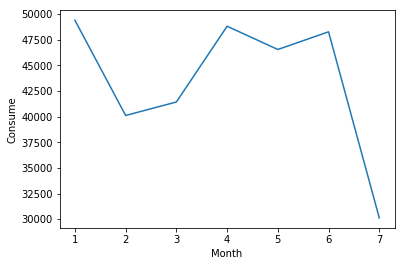

In [274]:
plt.plot(month_consume.index, month_consume)
plt.xlabel('Month')
plt.ylabel('Consume')
plt.show()

### 3.3客单价
客单价（per customer transaction）是指商场（超市）每一个顾客平均购买商品的金额，客单价也即是平均交易金额。

In [275]:
consumer_num = len(df['cardno'].unique())#消费者人数
pct = total_money / consumer_num
pct

125.5689447650457

### 3.4消费趋势
分组也是根据 week 进行的分组，之后求和，类似于上面按照月的来求和

画出随着 week 变化与 实收金额 actualmoney 的变化趋势

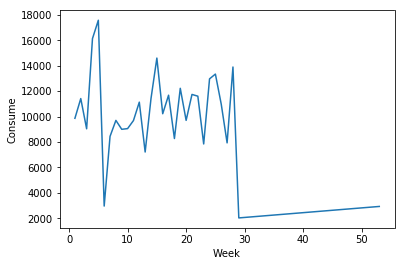

In [280]:
week_consume = data_consume_actual.groupby(data_consume_actual.index.week).sum()
plt.plot(week_consume.index, week_consume)
plt.xlabel('Week')
plt.ylabel('Consume')
plt.show()